# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-1**<br>
**Profesora:** Paula Aguirre <br>

## Clases 3: Tipos y formatos de datos

---

## 1. Datos de ejemplo.

Los datos autilizar en este ejemplo provienen del repositorio GitHub **Datos-COVID19** del Ministerio de Ciencia TyC:

https://github.com/MinCiencia/Datos-COVID19

En particular, usaremos el **Data Product 3**, cuya descripción es la siguiente.

"*Data Product 3 - Casos totales por región incremental: Archivo con valores separados por coma (csv) que concatena historia de publicaciones de casos totales por parte de MINSAL. El archivo contiene una columna 'Región', seguida por columnas correspondientes a '[fecha]'. Estas últimas columnas, ‘[fecha]’, contienen los 'Casos Confirmados' reportados por el Ministerio de Salud de Chile en cada una de las fechas que se indican en las respectivas columnas. Incluye versión con serie de tiempo.*"



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

/Users/paguirre/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key text.latex.preview in file /Users/paguirre/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/paguirre/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distrib

## 2. Ubicación de archivos.

Antes de improtar archvios de datos, necesitamos identificar dónde están guardados dentro de nuestro sistema, y en qué directorio estamos trabajando ("working directory").

Algunos comandos importantes:
- `!ls`: lista el contenido del directorio actual command lists all content in the current working directory.
- `%cd 'subdirectorio'`: permite cambiar la ubicación actual a 'subdirectorio'
- `cd ..`: permite navegar hacia atrás al directorio superior del actual
- `!pwd`: entrega la ruta del directorio actual
      

In [9]:
pwd

'/Volumes/GoogleDrive-111927105170361214696/Mi unidad/Cursos/IMT2200_IntroCienciaDatos/IMT2200_2022/imt2200_clases_local'

In [10]:
!ls

clase1 clase2 clase3


In [20]:
%cd imt2200_clases_local/clase3


/Volumes/GoogleDrive-111927105170361214696/Mi unidad/Cursos/IMT2200_IntroCienciaDatos/IMT2200_2022/imt2200_clases_local/clase3


## 2. Importación de datos.

Veremos primero cómo importar, inspeccionar y graficar datos estructurados.

### 2.1 `numpy`: np.loadtxt() y np.genfromtxt()

Numpy provee funciones para leer archivos de texto estructurado directamente como arreglos (`np.ndarray`). En primer lugar la función `np.loadtxt()`, permite cargar archivos cuyo contenido es solamente numérico. Sin embargo, generalmente trabajaremos con datasets que tienen distintos tipos de datos en distintas columnas; por ejemplo, strings y floats. En este caso, es necesario utilizar la función `np.genfromtxt()`, que puede manejar estas estructuras. Si pasamos como argumento `dtype=None`, la función infiere el tipo de datos de cada columna.

La documentación de ambas funciones se encuentra en: <br>
- https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
- https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html


In [21]:
data_file='CasosTotalesCumulativo.csv'

In [22]:
# Importar archivo: data
data = np.loadtxt(data_file, delimiter=',',dtype='str')#skiprows=1

# Explorar la data
print(data[0])
print(data.shape)
print(data)

['Region' '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06' '2020-03-07'
 '2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11' '2020-03-12'
 '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16' '2020-03-17'
 '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21' '2020-03-22'
 '2020-03-23' '2020-03-24' '2020-03-25' '2020-03-26' '2020-03-27'
 '2020-03-28' '2020-03-29' '2020-03-30' '2020-03-31' '2020-04-01'
 '2020-04-02' '2020-04-03' '2020-04-04' '2020-04-05' '2020-04-06'
 '2020-04-07' '2020-04-08' '2020-04-09' '2020-04-10' '2020-04-11'
 '2020-04-12' '2020-04-13' '2020-04-14' '2020-04-15' '2020-04-16'
 '2020-04-17' '2020-04-18' '2020-04-19' '2020-04-20' '2020-04-21'
 '2020-04-22' '2020-04-23' '2020-04-24' '2020-04-25' '2020-04-26'
 '2020-04-27' '2020-04-28' '2020-04-29' '2020-04-30' '2020-05-01'
 '2020-05-02' '2020-05-03' '2020-05-04' '2020-05-05' '2020-05-06'
 '2020-05-07' '2020-05-08' '2020-05-09' '2020-05-10' '2020-05-11'
 '2020-05-12' '2020-05-13' '2020-05-14' '2020-05-15' '2020-05-16'
 

In [23]:
# Importar data como floats y saltar la primera fila: data_float
data = np.genfromtxt(data_file, delimiter=',', dtype=None,skip_header=1)

print(data[0])
print(data.shape)


#numpy se las puede arreglar con datos mezclados pero es mejor panda

('Arica y Parinacota', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 6, 6, 6, 7, 12, 12, 28, 41, 53, 63, 75, 87, 107, 115, 115, 120, 124, 129, 134, 142, 145, 161, 170, 180, 210, 239, 245, 252, 265, 268, 272, 279, 297, 307, 308, 308, 315, 318, 325, 327, 337, 340, 351, 351, 359, 363, 368, 377, 378, 398, 422, 424, 453, 471, 482, 498, 513, 522, 541, 562, 582, 588, 619, 636, 654, 701, 736, 782, 819, 850, 874, 914, 930, 967, 1011, 1062, 1109, 1139, 1156, 1218, 1239, 1295, 1325, 1371, 1420, 1443, 1473, 1511, 1549, 1611, 1649, 1685, 1713, 1776, 1832, 1889, 1949, 2006, 2087, 2119, 2179, 2273, 2322, 2395, 2467, 2562, 2638, 2735, 2840, 2936, 3012, 3056, 3188, 3291, 3350, 3482, 3627, 3727, 3862, 3939, 4060, 4159, 4257, 4343, 4450, 4525, 4584, 4662, 4727, 4825, 4911, 4988, 5138, 5241, 5334, 5451, 5512, 5595, 5692, 5779, 5848, 5899, 5935, 6004, 6083, 6167, 6210, 6290, 6330, 6375, 6419, 6482, 6538, 6599, 6666, 6721, 6746, 6808, 6862, 6912, 6967, 7030, 7069, 7101, 71

/Users/paguirre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


En general, `numpy` se las puede arreglar con conjuntos de datos con tipos mezclados, pero la librería natural para trabajar con datos estructurados es `pandas`.

### 2.2 `pandas`: read_csv y DataFrames

La función `pd.read_csv()` permite leer un archivo de texto en formato CSV (comma separated value) y generar un DataFrame.
El delimitador por defecto es la coma (,), pero también pueden leerse datasets con otros tipos de separación, especificando el parámetro `delimiter`.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html


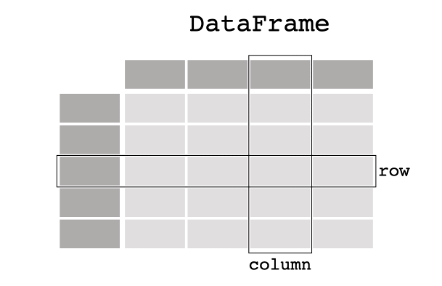

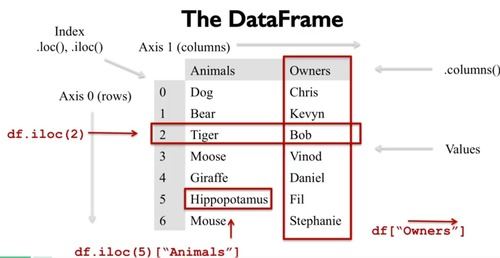


#### Leer e inspeccionar un DataFrame.


In [24]:
dat=pd.read_csv('CasosTotalesCumulativo.csv', delimiter=',')
dat

,Region,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15
0,Arica y Parinacota,0,0,0,0,0,0,0,0,0,...,67003,67264,67439,67632,67968,68326,68603,68861,69085,69238
1,Tarapacá,0,0,0,0,0,0,0,0,0,...,94114,94531,94890,95196,95701,96165,96615,97042,97364,97606
2,Antofagasta,0,0,0,0,0,0,0,0,0,...,153652,154189,154593,154879,155477,156117,156790,157314,157722,158017
3,Atacama,0,0,0,0,0,0,0,0,0,...,92110,92508,92707,92963,93321,93721,94084,94379,94653,94869
4,Coquimbo,0,0,0,0,0,0,0,0,0,...,169461,170041,170581,170944,171635,172425,173183,173903,174530,175016
5,Valparaíso,0,0,0,0,0,0,0,0,0,...,398775,399765,400446,400914,402023,403224,404405,405482,406429,407095
6,Metropolitana,0,1,2,3,4,6,9,10,14,...,1662351,1664637,1666538,1667741,1670261,1673493,1676457,1679229,1681734,1683363
7,O’Higgins,0,0,0,0,0,0,0,0,0,...,182895,183328,183656,183902,184466,185119,185682,186248,186718,187040
8,Maule,1,2,2,2,2,3,4,5,7,...,279483,280286,280867,281328,282223,283542,284818,285919,286906,287625
9,Ñuble,0,0,0,0,0,0,0,0,0,...,120182,120517,120811,121069,121585,122103,122618,123089,123526,123828


In [25]:
type(dat['Region'])


pandas.core.series.Series

In [26]:
dat.columns

Index(['Region', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
       ...
       '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09', '2022-08-10',
       '2022-08-11', '2022-08-12', '2022-08-13', '2022-08-14', '2022-08-15'],
      dtype='object', length=897)

In [27]:
dat.tail(5)

,Region,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15
12,Los Ríos,0,0,0,0,0,0,0,0,0,...,119933,120359,120656,120928,121354,121975,122555,123068,123544,123851
13,Los Lagos,0,0,0,0,1,1,1,1,1,...,211761,212279,212557,212769,213252,213911,214712,215273,215821,216281
14,Aysén,0,0,0,0,0,0,0,0,0,...,28957,29051,29108,29153,29290,29409,29544,29648,29770,29843
15,Magallanes,0,0,0,0,0,0,0,0,0,...,58961,59050,59096,59156,59282,59406,59529,59650,59752,59854
16,Total,1,3,4,5,7,10,15,17,23,...,4297144,4306955,4314459,4320173,4331416,4344910,4357818,4369706,4380148,4387731


In [28]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Columns: 897 entries, Region to 2022-08-15
dtypes: int64(896), object(1)
memory usage: 119.3+ KB


#### Índices y acceso a información de celdas.

In [29]:
dat.iloc[1:3]

,Region,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15
1,Tarapacá,0,0,0,0,0,0,0,0,0,...,94114,94531,94890,95196,95701,96165,96615,97042,97364,97606
2,Antofagasta,0,0,0,0,0,0,0,0,0,...,153652,154189,154593,154879,155477,156117,156790,157314,157722,158017


In [36]:
dat['2022-08-13']

0       68861
1       97042
2      157314
3       94379
4      173903
5      405482
6     1679229
7      186248
8      285919
9      123089
10     422353
11     248206
12     123068
13     215273
14      29648
15      59650
16    4369706
Name: 2022-08-13, dtype: int64

In [37]:
dat['Region']=='Maule'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
Name: Region, dtype: bool

In [38]:
dat_maule=dat[dat['Region']=='Maule']
dat_maule

,Region,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15
8,Maule,1,2,2,2,2,3,4,5,7,...,279483,280286,280867,281328,282223,283542,284818,285919,286906,287625


In [39]:
cols=dat.columns[1::]
cols

Index(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
       '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       ...
       '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09', '2022-08-10',
       '2022-08-11', '2022-08-12', '2022-08-13', '2022-08-14', '2022-08-15'],
      dtype='object', length=896)

In [40]:
dat2=dat[cols]
dat2

,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,...,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15
0,0,0,0,0,0,0,0,0,0,0,...,67003,67264,67439,67632,67968,68326,68603,68861,69085,69238
1,0,0,0,0,0,0,0,0,0,0,...,94114,94531,94890,95196,95701,96165,96615,97042,97364,97606
2,0,0,0,0,0,0,0,0,0,0,...,153652,154189,154593,154879,155477,156117,156790,157314,157722,158017
3,0,0,0,0,0,0,0,0,0,0,...,92110,92508,92707,92963,93321,93721,94084,94379,94653,94869
4,0,0,0,0,0,0,0,0,0,0,...,169461,170041,170581,170944,171635,172425,173183,173903,174530,175016
5,0,0,0,0,0,0,0,0,0,0,...,398775,399765,400446,400914,402023,403224,404405,405482,406429,407095
6,0,1,2,3,4,6,9,10,14,23,...,1662351,1664637,1666538,1667741,1670261,1673493,1676457,1679229,1681734,1683363
7,0,0,0,0,0,0,0,0,0,0,...,182895,183328,183656,183902,184466,185119,185682,186248,186718,187040
8,1,2,2,2,2,3,4,5,7,7,...,279483,280286,280867,281328,282223,283542,284818,285919,286906,287625
9,0,0,0,0,0,0,0,0,0,1,...,120182,120517,120811,121069,121585,122103,122618,123089,123526,123828


#### Operaciones con columnas.

Cada columna de un DataFrame es una Serie, que corresponde a un arreglo 1-D con una etiqueta. Por lo tanto, en el caso de columnas con datos numéricos, podemos aplicar todas las operaciones matemáticas disponibles en `numpy`:

https://numpy.org/doc/stable/reference/routines.math.html

También podemos realizar operaciones entre 2 o más columnas, o entre columnas y escalares.


In [35]:
dat.sum(axis=0)


Region        Arica y ParinacotaTarapacáAntofagastaAtacamaCo...
2020-03-03                                                    2
2020-03-04                                                    6
2020-03-05                                                    8
2020-03-06                                                   10
                                    ...                        
2022-08-11                                              8689778
2022-08-12                                              8715594
2022-08-13                                              8739370
2022-08-14                                              8760254
2022-08-15                                              8775420
Length: 897, dtype: object